In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import sklearn
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the files
wine_df = pd.read_csv('Resources\winequality_cleaned.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [5]:
# Describe the stats
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


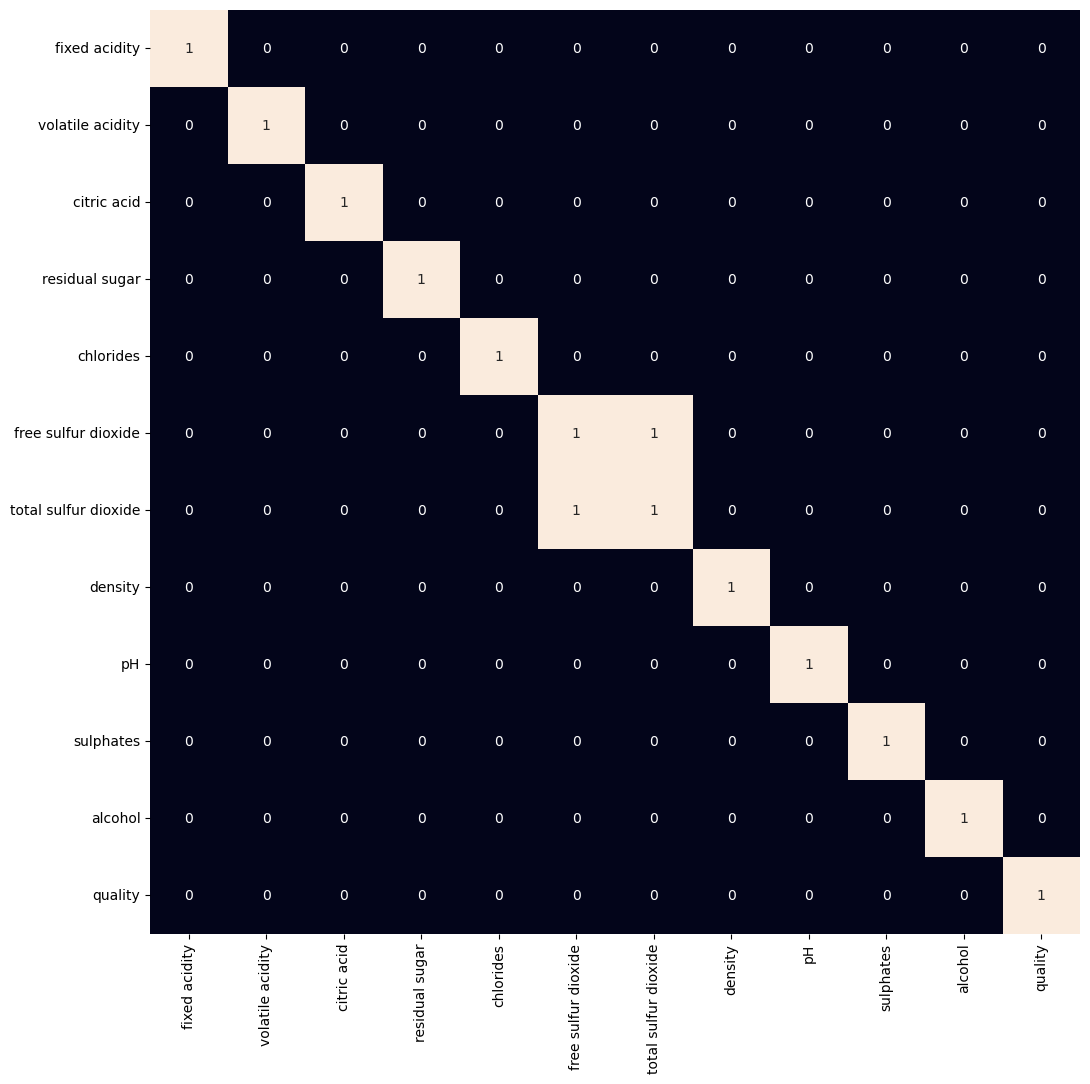

In [6]:
# Show heatmap to look for any columns that are highly correlated
plt.figure(figsize=(12, 12))
sb.heatmap(wine_df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [7]:
# Since the sulfur is highly correlated we will remove those columns
wine_df = wine_df.drop('total sulfur dioxide', axis=1)

In [8]:
# We need to change the color of the wine to 0 and 1. White = 1 and Red = 0
wine_df.replace({'white': 1, 'red': 0}, inplace=True)

In [9]:
# Next we set up the model by making the quality >5 a 1 and everything else 0
wine_df['best quality'] = [1 if x > 5 else 0 for x in wine_df.quality]

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,color,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0,0


In [10]:
# Setting up the features
features = wine_df.drop(['quality', 'best quality'], axis=1)
target = wine_df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [11]:
# We need to normalize the data before training
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

# Logistic Regression:

Accuracy Score: 0.74


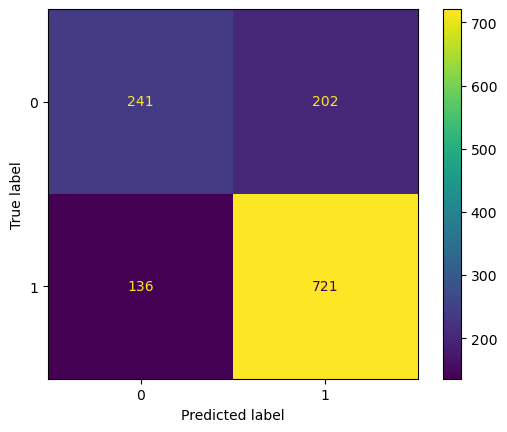

In [12]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score:",accuracy_score(ytest,ypred))
confusion_mat = confusion_matrix(ytest,ypred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

# SVC:

Accuracy Score: 0.7492307692307693


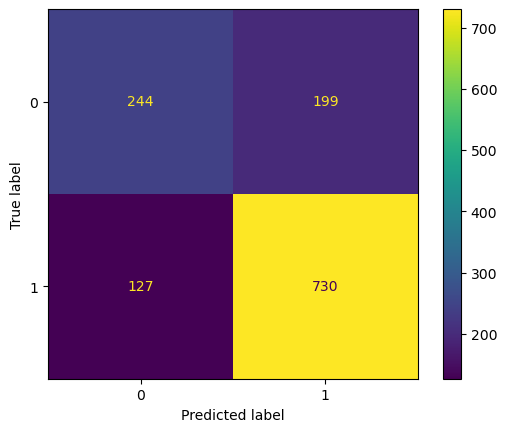

In [13]:
model = SVC()
model.fit(xtrain,ytrain)
pred_y = model.predict(xtest)


print("Accuracy Score:",accuracy_score(ytest,pred_y))
confusion_mat = confusion_matrix(ytest,pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()

# Xgboost:

Accuracy Score: 0.8153846153846154


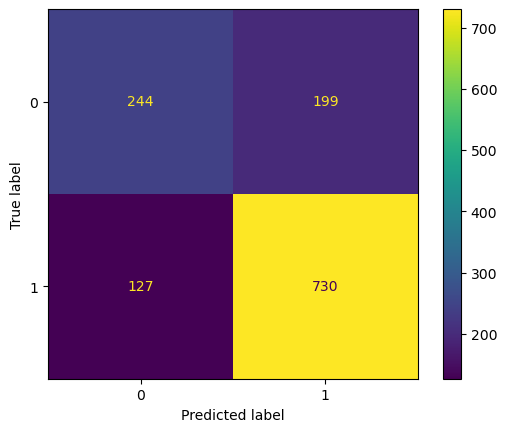

In [14]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(xtrain, ytrain)
y_pred5 = model5.predict(xtest)

print("Accuracy Score:",accuracy_score(ytest,y_pred5))
confusion_mat = confusion_matrix(ytest,pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.show()